<td>
   <a target="_blank" href="https://www.clarifai.com/" ><img src="https://upload.wikimedia.org/wikipedia/commons/b/bc/Clarifai_Logo_FC_Web.png" width=256/></a>
</td>

<td>
<a href="https://colab.research.google.com/github/Clarifai/examples/blob/main/search/cross_modal_search.ipynb" target="_blank"><img
src="https://colab.research.google.com/assets/colab-badge.svg" alt="Colab"></a>
</td>

# Cross Modal Search

This notebook provides an introductory guide to setting up a cross-modal search system on the Clarifai platform using the Clarifai Python SDK. Here we use a text-to-image search example to illustrate how quickly such a system can be set up using only a few lines of code.

## Requirements

In [ ]:
!pip install -U clarifai

In [ ]:
import os
#Replace your PAT
os.environ['CLARIFAI_PAT'] = "PAT"

*Note: Guide to get your [PAT](https://docs.clarifai.com/clarifai-basics/authentication/personal-access-tokens)*

## Setup an App
Each app has a base workflow. Base workflows index your data and provide your app with a default knowledge base. Here we choose the Universal workflow.

In [ ]:
from clarifai.client.user import User
#replace your "user_id"
client = User(user_id="user_id")

#(Example Workflows: 'Universal', 'Empty', 'General')
app = client.create_app(app_id="cross_modal_search", base_workflow="Universal")

The following example images are used in this guide.

In [4]:
urls = [
    "https://images.pexels.com/photos/139257/pexels-photo-139257.jpeg",
    "https://images.pexels.com/photos/1879386/pexels-photo-1879386.jpeg",
    "https://images.pexels.com/photos/1071882/pexels-photo-1071882.jpeg"
]

## Adding Inputs
Inputs can be directly uploaded into the app. 

In [ ]:
input_obj = app.inputs()

for i, url in enumerate(urls):
    input_obj.upload_from_url(input_id=f"input{i}", image_url=url)

## Search
A search object can be instantiated via the App object or directly using `user_id` and `app_id`.

In [21]:
### Alternative
# from clarifai.client.search import Search
# search = Search(user_id=user_id, app_id=app_id, top_k=2)

search = app.search(top_k=2)
response = search.query(ranks=[{"text_raw": "Red pineapples on the beach."}])

See the results by checking the “hits” attribute

In [22]:
for r in response:
    hit = r.hits[0].input.data.image.url
    break

In [24]:
hit

'https://images.pexels.com/photos/139257/pexels-photo-139257.jpeg'

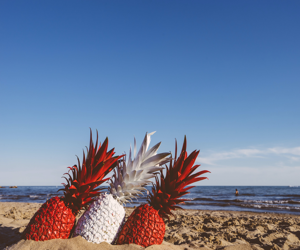

In [28]:
from PIL import Image
import requests
from IPython.display import display

hit_img = Image.open(requests.get(hit, stream=True).raw).resize((300,250))
display(hit_img)

## (optional) Setup a Dataset
A dataset is a collection of data examples you can use to annotate and train, test, evaluate your machine learning models. With Clarifai datasets, you can manage the datasets you want to use for visual search, training, and evaluation. This is recommended for production usage.

In [ ]:
app2 = client.create_app(app_id="cross_modal_search_datasets", base_workflow="Universal")
dataset = app2.create_dataset(dataset_id="demo_dataset")

Inputs can be uploaded into a dataset via a csv file.
The csv file should at least specify an `input` column for the input URLs.

In [31]:
## Skip this if you already have a csv file
import pandas as pd

df = pd.DataFrame(urls, columns=['input'])
df.to_csv("images.csv", index=False)

In [36]:
dataset.upload_from_csv(csv_path='images.csv', input_type='image', csv_type='url', labels=False)

Uploading inputs: 100%|██████████| 1/1 [00:06<00:00,  6.42s/it]


## Search within a Dataset
Add a filter in the search query.

In [ ]:
search = app2.search(top_k=2)
response = search.query(ranks=[{"text_raw": "Red pineapples on the beach."}], filters=[{"input_dataset_id": dataset.id}])

## Clarifai Resources

**Website**: [https://www.clarifai.com](https://www.clarifai.com/)

**Demo**: [https://clarifai.com/demo](https://clarifai.com/demo)

**Sign up for a free Account**: [https://clarifai.com/signup](https://clarifai.com/signup)

**Developer Guide**: [https://docs.clarifai.com](https://docs.clarifai.com/)

**Clarifai Community**: [https://clarifai.com/explore](https://clarifai.com/explore)

**Python SDK Docs**: [https://docs.clarifai.com/python-sdk/api-reference](https://docs.clarifai.com/python-sdk/api-reference)

---